# Clean and Analyze Employee Exit Surveys

In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


In [1]:
# dependencies

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# data

dete_survey = pd.read_csv('dete_survey.csv', encoding='utf-8', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv', encoding='utf-8', na_values='Not Stated')

In [3]:
dete_survey.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [4]:
tafe_survey.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [5]:
# drop columns that are not relevant

dete_survey_updated = dete_survey.drop(columns=dete_survey.columns[27:50])
tafe_survey_updated = tafe_survey.drop(columns=tafe_survey.columns[18:67])


In [6]:
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Ill Health,Traumatic incident,Work life balance,Workload,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,False,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,False,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,False,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,False,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,False,False,True,False,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,NaN,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


# Clean up column names

In [8]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload', 'age',
       'aboriginal', 'torres_strait', 'south_sea', 'disability', 'nesb'],
      dtype='object')

In [9]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'CurrentAge. Current Age', 'Employment Type. Employment Type',
       'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current 

In [10]:
tafe_updated_cols = {
                   'Record ID': 'id', 'WorkArea': 'work_area',
                   'Reason for ceasing employment': 'separationtype',
                   'Contributing Factors. Career Move - Public Sector ': 'career_move_pub',
                   'Contributing Factors. Career Move - Private Sector ': 'career_move_private',
                   'Contributing Factors. Career Move - Self-employment': 'career_move_self',
                   'Contributing Factors. Ill Health': 'ill_health',
                   'Contributing Factors. Maternity/Family': 'maternity_family',
                   'Contributing Factors. Dissatisfaction': 'general_dissatisfaction',
                   'Contributing Factors. Job Dissatisfaction': 'job_dissatisfaction',
                   'Contributing Factors. Interpersonal Conflict': 'interpersonal_conflict',
                   'Contributing Factors. Study': 'study', 'Contributing Factors. Travel': 'travel',
                   'Contributing Factors. Other': 'other', 'Contributing Factors. NONE': 'none',
                   'Main Factor. Which of these was the main factor for leaving?': 'main_factor',
                   'CurrentAge. Current Age':'age', 'Employment Type. Employment Type':'employment_type',
                   'Classification. Classification': 'classification',
                   'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'employment_length',
                   'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'employment_length_current'
            }

tafe_survey_updated.rename(columns=tafe_updated_cols, inplace=True)

tafe_survey_updated.columns = tafe_survey_updated.columns.str.lower()
tafe_survey_updated

,id,institute,work_area,cessation year,separationtype,career_move_pub,career_move_private,career_move_self,ill_health,maternity_family,...,study,travel,other,none,main_factor,age,employment_type,classification,employment_length,employment_length_current
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,NaN,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,NaN,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,-,Other,-,NaN,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2
700,6.350712e+17,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,41 45,Temporary Full-time,Professional Officer (PO),1-2,1-2


# Clean up column data for consistency

In [11]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,ill_health,traumatic_incident,work_life_balance,workload,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,False,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,False,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,False,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,False,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,False,False,True,False,61 or older,NaN,NaN,NaN,NaN,NaN


In [12]:
dete_survey_updated['cease_date'] = dete_survey_updated['cease_date'].astype(str).str.replace('/', ' ').str.split().str.get(-1)
dete_survey_updated['cease_date'] = dete_survey_updated['cease_date'].astype(float)
dete_survey_updated['dete_start_date'] = dete_survey_updated['dete_start_date'].astype(float)


In [13]:
tafe_survey_updated.head()

,id,institute,work_area,cessation year,separationtype,career_move_pub,career_move_private,career_move_self,ill_health,maternity_family,...,study,travel,other,none,main_factor,age,employment_type,classification,employment_length,employment_length_current
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,NaN,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [14]:
tafe_survey_updated['age'] = tafe_survey_updated['age'].astype(str).str.replace('  ','-')
tafe_survey_updated['cessation year'] = tafe_survey_updated['cessation year'].astype(float)

# Transform data

In [15]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,ill_health,traumatic_incident,work_life_balance,workload,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,2012.0,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,False,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),2012.0,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,False,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),2012.0,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,False,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,False,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,2012.0,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,False,False,True,False,61 or older,NaN,NaN,NaN,NaN,NaN


In [16]:
dete_groups = dete_survey_updated.groupby('separationtype')

dete_resign_move = dete_groups.get_group('Resignation-Move overseas/interstate')
dete_resign_other_emp = dete_groups.get_group('Resignation-Other employer')
dete_resign_other = dete_groups.get_group('Resignation-Other reasons')

In [17]:
dete_resign = pd.concat([dete_resign_move, dete_resign_other_emp, dete_resign_other]).reset_index()
dete_resign['employment_length'] = dete_resign['cease_date'] - dete_resign['dete_start_date']
dete_resign['institute'] = 'dete'



In [18]:
dete_resign.columns

Index(['index', 'id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload', 'age',
       'aboriginal', 'torres_strait', 'south_sea', 'disability', 'nesb',
       'employment_length', 'institute'],
      dtype='object')

In [19]:
dete_resign_factors = [
                       'job_dissatisfaction', 'dissatisfaction_with_the_department',
                       'physical_work_environment', 'lack_of_recognition',
                       'lack_of_job_security', 'work_location', 'employment_conditions',
                       'work_life_balance', 'workload'
                      ]

dete_resign['dissatisfied'] = dete_resign[dete_resign_factors].any(axis=1, skipna=False)
dete_resign['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [20]:
dete_resign['employment_length'] = dete_resign['employment_length'].dropna()
dete_resign['employment_length'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
2.0     14
9.0     14
7.0     13
8.0      8
13.0     8
15.0     7
20.0     7
17.0     6
22.0     6
14.0     6
10.0     6
12.0     6
16.0     5
18.0     5
11.0     4
23.0     4
24.0     4
19.0     3
21.0     3
39.0     3
32.0     3
25.0     2
36.0     2
26.0     2
28.0     2
30.0     2
35.0     1
29.0     1
38.0     1
42.0     1
27.0     1
33.0     1
49.0     1
41.0     1
34.0     1
31.0     1
Name: employment_length, dtype: int64

In [21]:
tafe_groups = tafe_survey_updated.groupby('separationtype')

tafe_resign = tafe_groups.get_group('Resignation').reset_index()
tafe_resign['institute'] = 'tafe'


In [22]:
tafe_resign.columns

Index(['index', 'id', 'institute', 'work_area', 'cessation year',
       'separationtype', 'career_move_pub', 'career_move_private',
       'career_move_self', 'ill_health', 'maternity_family',
       'general_dissatisfaction', 'job_dissatisfaction',
       'interpersonal_conflict', 'study', 'travel', 'other', 'none',
       'main_factor', 'age', 'employment_type', 'classification',
       'employment_length', 'employment_length_current'],
      dtype='object')

In [23]:
tafe_resign['general_dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: general_dissatisfaction, dtype: int64

In [24]:
tafe_resign['job_dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: job_dissatisfaction, dtype: int64

In [25]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
    
tafe_resign_factors = [ 'general_dissatisfaction', 'job_dissatisfaction']
tafe_resign[tafe_resign_factors] = tafe_resign[tafe_resign_factors].applymap(update_vals)
tafe_resign['dissatisfied'] = tafe_resign[tafe_resign_factors].any(axis=1, skipna=False)


In [26]:
tafe_resign['dissatisfied'].value_counts()

False    241
True      99
Name: dissatisfied, dtype: int64

In [27]:
tafe_resign['employment_length'] = tafe_resign['employment_length'].dropna()
tafe_resign['employment_length'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: employment_length, dtype: int64

In [28]:
resign_group = pd.concat([dete_resign, tafe_resign]).reset_index()
resign_group.dropna(thresh=500, axis=1)

,level_0,index,id,separationtype,job_dissatisfaction,ill_health,age,employment_length,institute,dissatisfied
0,0,11,1.200000e+01,Resignation-Move overseas/interstate,False,False,31-35,3.0,dete,False
1,1,39,4.000000e+01,Resignation-Move overseas/interstate,True,False,21-25,NaN,dete,True
2,2,42,4.300000e+01,Resignation-Move overseas/interstate,False,False,41-45,1.0,dete,False
3,3,48,4.900000e+01,Resignation-Move overseas/interstate,False,False,21-25,3.0,dete,False
4,4,50,5.100000e+01,Resignation-Move overseas/interstate,False,False,21-25,3.0,dete,False
...,...,...,...,...,...,...,...,...,...,...
646,335,696,6.350660e+17,Resignation,False,-,21-25,5-6,tafe,False
647,336,697,6.350668e+17,Resignation,False,-,51-55,1-2,tafe,False
648,337,698,6.350677e+17,Resignation,False,-,nan,NaN,tafe,False
649,338,699,6.350704e+17,Resignation,False,-,51-55,5-6,tafe,False


In [29]:
resign_group.columns

Index(['level_0', 'index', 'id', 'separationtype', 'cease_date',
       'dete_start_date', 'role_start_date', 'position', 'classification',
       'region', 'business_unit', 'employment_status',
       'career_move_to_public_sector', 'career_move_to_private_sector',
       'interpersonal_conflicts', 'job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'maternity/family', 'relocation',
       'study/travel', 'ill_health', 'traumatic_incident', 'work_life_balance',
       'workload', 'age', 'aboriginal', 'torres_strait', 'south_sea',
       'disability', 'nesb', 'employment_length', 'institute', 'dissatisfied',
       'work_area', 'cessation year', 'career_move_pub', 'career_move_private',
       'career_move_self', 'maternity_family', 'general_dissatisfaction',
       'interpersonal_conflict', 'study', 'travel', 'other', 'none',
       'main

In [30]:
resign_group['job_dissatisfaction'].value_counts()


False    540
True     103
Name: job_dissatisfaction, dtype: int64

In [31]:
resign_group['employment_length'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
12.0                   6
10.0                   6
22.0                   6
14.0                   6
17.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
39.0                   3
21.0                   3
32.0                   3
19.0                   3
28.0                   2
25.0                   2
30.0                   2
36.0                   2
26.0                   2
42.0                   1


In [32]:
resign_group['employment_length'] = resign_group['employment_length'].astype(str).str.replace('11-20', '20').str.replace('Less than 1 year', '0').str.replace('More than 20 years', '20').str.replace('1-2', '2').str.replace('3-4', '4').str.replace('5-6', '6').str.replace('7-10', '10')
resign_group['employment_length'] = resign_group['employment_length'].astype(float)
resign_group['employment_length'].value_counts().sort_index(ascending=False)




49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0    43
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0    27
9.0     14
8.0      8
7.0     13
6.0     50
5.0     23
4.0     79
3.0     20
2.0     78
1.0     22
0.0     93
Name: employment_length, dtype: int64

In [33]:
def update_vals(exp):
    if pd.isnull(exp):
        pass
    elif exp < 3:
        return 'New'
    elif exp >= 3 and exp <= 6:
        return 'Experienced'
    elif exp > 6 and exp <= 10:
        return 'Established'
    elif exp > 10:
        return 'Veteran'
    
service_group = resign_group['employment_length'].apply(update_vals)
service_group.value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: employment_length, dtype: int64

In [34]:
resign_group['institute_service'] = service_group
resign_group['dissatisfied'].value_counts(dropna=False)

False    403
True     248
Name: dissatisfied, dtype: int64

In [35]:
resign_group_pivot_table = resign_group.pivot_table('dissatisfied', 'institute_service')

In [36]:
resign_group_pivot_table

,dissatisfied
institute_service,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


<AxesSubplot:title={'center':'Average dissatisfaction by Employment Length'}, xlabel='institute_service'>

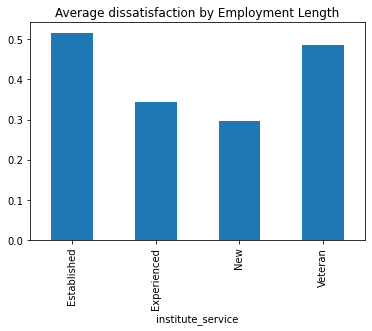

In [37]:
resign_group_pivot_table.plot(kind='bar', legend=False, title='Average dissatisfaction by Employment Length')

# In analyzing the percentage of dissatisfied workers that resigned, we can see that about 51% of Established workers(7-10 years) and about 48% of Veteran workers(11 or more years) had resigned due to their dissatisfaction at the their company.